In [16]:
import torch

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

In [12]:
### mimic results as an example

mimic_result = torch.load('mimic_experiment.pt')

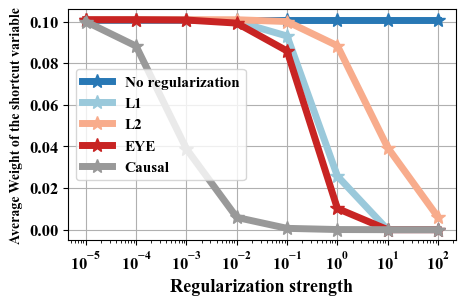

In [27]:
### shortcut feature weights

def convert_weight(experiment_strength):
    weights_strength = {}
    test_loss = {}
    for idx , (reg_strength, expeiriment) in enumerate(experiment_strength.items()):
        for name, model in expeiriment.items():
            if idx == 0:
                weights_strength[name] = []
                test_loss[name] = []
            shortcut_weight = model.model.weight[0].abs().detach().numpy()[-10:]
            weights_strength[name].append(np.mean(shortcut_weight))
            test_loss[name].append(model.test_loss[-1].item())
    return weights_strength, test_loss

labels = {"without_reg": "No regularization", "l1": "L1", "l2":"L2", "eye":"EYE", "causal":"Causal"}
color_dict = {"without_reg": "#2878b5", "l1": "#9ac9db", "l2": "#f8ac8c", "eye": "#c82423", "causal": "#999999"}

reg_strength_list = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

weights_strength = {}
testloss_strength = {}
for idx, experiment_strength in mimic_result.items():
    weights_strength[idx], testloss_strength[idx] = convert_weight(experiment_strength)

fig, ax = plt.subplots(figsize=(5,3), dpi=100)
for name, label in labels.items():
    shortcut_weight = []
    for idx, value in weights_strength.items():
        shortcut_weight.append(value[name])
    shortcut_weight = np.array(shortcut_weight)
    plt.plot(reg_strength_list, np.mean(shortcut_weight, axis=0), label=labels[name], color=color_dict[name], lw=5, marker="*", markersize=10)
    error = np.std(shortcut_weight, axis=0)*1.96/np.sqrt(10)
    ax.fill_between(reg_strength_list, np.mean(shortcut_weight, axis=0) - error, np.mean(shortcut_weight, axis=0) + error, alpha=0.2, color=color_dict[name])
    
plt.grid(True)
plt.legend(prop = {'family':'times new roman','size':11, 'weight':'bold'})
plt.xticks(fontsize=12, fontfamily='times new roman', fontweight="bold")
plt.yticks(fontsize=12, fontfamily='times new roman', fontweight="bold")
plt.xlabel("Regularization strength", fontsize=13, fontfamily='times new roman', fontweight="bold")
plt.ylabel("Average Weight of the shortcut variable", fontsize=10, fontfamily='times new roman', fontweight="bold")
plt.xscale("log")

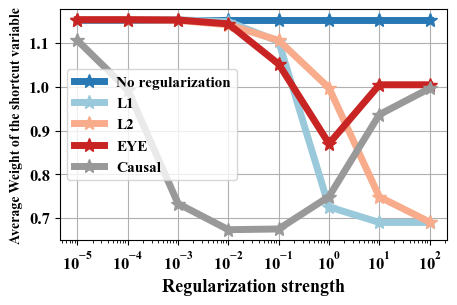

In [28]:
fig, ax = plt.subplots(figsize=(5,3), dpi=100)
for name, label in labels.items():
    shortcut_weight = []
    for idx, value in testloss_strength.items():
        shortcut_weight.append(value[name])
    shortcut_weight = np.array(shortcut_weight)
    plt.plot(reg_strength_list, np.mean(shortcut_weight, axis=0), label=labels[name], color=color_dict[name], lw=5, marker="*", markersize=10)
    error = np.std(shortcut_weight, axis=0)*1.96/np.sqrt(10)
    ax.fill_between(reg_strength_list, np.mean(shortcut_weight, axis=0) - error, np.mean(shortcut_weight, axis=0) + error, alpha=0.2, color=color_dict[name])
    
plt.grid(True)
plt.legend(prop = {'family':'times new roman','size':11, 'weight':'bold'})
plt.xticks(fontsize=12, fontfamily='times new roman', fontweight="bold")
plt.yticks(fontsize=12, fontfamily='times new roman', fontweight="bold")
plt.xlabel("Regularization strength", fontsize=13, fontfamily='times new roman', fontweight="bold")
plt.ylabel("Average Weight of the shortcut variable", fontsize=10, fontfamily='times new roman', fontweight="bold")
plt.xscale("log")